Loan SARAZIN & Anna MARIZY

# Mise en oeuvre de l'algorithme EM

## Calcul de la valeur de la densité de probabilité d'un mélange de gaussienne en un point
### Les paramétres de la fonction gm_pdf
<ul>
<li>x : le point où l'on calcule la valeur de la densitè</li>
<li>mu : le vecteur des moyennes des gaussiennes</li>
<li>sigma : le vecteur des écart-types des gaussiennes</li>
<li>p : le vecteur des probabilitès de la loi multinomiale associèe</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
import time

from sklearn.mixture import GaussianMixture

GaussianMixture doc : https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html?highlight=gaussian%20mixture#sklearn.mixture.GaussianMixture

In [2]:
def gm_pdf(x, mu, sigma, p):
    #Initialisation de la variable de sortie
    resultat = 0.0
    #Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur les écarts-types')
    else:
    # Calcul de la valeur de la densité
        for i in range(0, len(p)):
            resultat = resultat + p[i] * norm.pdf(x, mu[i], sigma[i])
    return resultat

## Génération de nombre aléatoire suivant un mélange de gaussienne
Dans un mélange de gaussienne chaque densité de probabilité correspondant à une loi normale est pondérée par un coefficient plus petit que un.
La somme de tous ces coefficients est égale à un. Une variable aléatoire qui suit une loi normale suit donc une des lois normales du mélange avec une probabilité égale au coefficient de pondération de cette même loi normale. Pour générer un échantillon suivant une loi normale, il faut donc procéder en deux étapes :
<ol>
<li>Tirer aléatoirement un nombre entre 1 et N (le nombre de gaussiennes du mélange) suivant une loi multinomiale définie par les coefficients du mélange.</li>
<li>Une fois ce nombre obtenu, on génère le nombre suivant la loi normale associée.</li>
</ol>

### Les paramètres de la fonction gm_rnd

<ul>
<li>mu : le vecteur des moyennes des gaussiennes</li>
<li>sigma : le vecteur des écart-types des gaussiennes</li>
<li>p : le vecteur des probabilités de la loi multinomiale associée</li>
</ul>

In [3]:
def gm_rnd(mu, sigma, p):
    # Initialisation de la variable de sortie
    resultat = 0.0
    #Contrôle de la cohérence des paramètres d'entrée
    #Le vecteur de moyenne doit avoir la même longueur que le vecteur p
    if len(mu) != len(p):
        print('Erreur de dimension sur la moyenne')
    # Le vecteur des écart-types doit avoir la même longueur que le vecteur p
    elif len(sigma) != len(p):
            print('Erreur de dimension sur sur les écarts-types')
    else:
    #Génération de l'échantillon
    # On échantillonne suivant une loi uniforme sur [0,1]
        u = uniform.rvs(loc = 0.0, scale = 1.0, size = 1)
    # % Chaque test suivant permet de définir un intervalle sur lequel la
    # probabilité d'appartenance de la variable uniforme est égale à l'une des
    # probabilités définie dans le vecteur p. Lorsque u appartient à l'un de
    # ces intervalles, c'est équivalent à avoir générer une variable aléatoire
    # suivant l'un des éléments de p. Par exemple, pour le premier test
    # ci-dessous, la probabilité que u appartienne à l'intervalle [0,p[0][ est
    # égale à p[0] puisque u suit une loi uniforme. Donc si u appartient à
    # [0,p[0][ cela est équivalent à avoir tirer suivant l'événement de probabilité p[0].
        if u < p[0]: # On test si on a généré un événement de probabilité p[0]
            resultat = sigma[0] * norm.rvs(loc = 0, scale = 1, size = 1) + mu[0]
            # Pour générer suivant une loi normale quelconque, il suffit de multiplier
            # une variable normale centrée réduite (moyenne nulle et écart-type égal à 1)
            # par l'écart-type désité et d'additionner la moyenne désirée au produit précédent.
        for i in range(1, len(p)):
            if (u > np.sum(p[0:i])) and (u <= np.sum(p[0:i+1])): # On test si on a généré
                # un événement de probabilité p[i]
                resultat = sigma[i] * norm.rvs(loc = 0.0, scale = 1.0, size = 1) + mu[i]
                # Pour générer suivant une loi normale quelconque, il suffit de multiplier
                # une variable normale centrée réduite (moyenne nulle et écart-type égal à 1)
                # par l'écart-type désité et d'additionner la moyenne désirée au produit précédent.
    return resultat

### Les paramètres de la densité de mélange de gaussienne

In [4]:
p = np.array([0.2, 0.5, 0.3])
mu = np.array([-5.0, 0.0, 6.0])
sigma = np.array([1.0, 0.5, 1.0])

### Calcul de la densité de probabilité du mélange de gaussienne

In [5]:
x = np.arange(-20,20, 0.001)
pointPdf = gm_pdf(x, mu, sigma, p)

### Tracé de la densité de probabilité du mélange de gaussienne

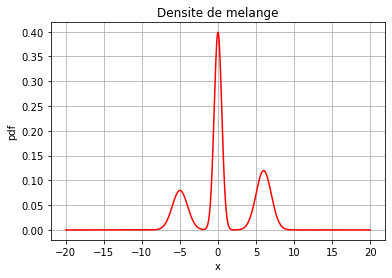

In [6]:
plt.plot(x, pointPdf, 'r-')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
plt.grid()
plt.show()

### Génération d'échantillons suivant  densité de probabilité du mélange de gaussienne

In [7]:
nbEchantillon = 1000
donnees = np.array(nbEchantillon*[0],dtype = float)
for i in range(0, nbEchantillon, 1):
    donnees[i] = gm_rnd(mu, sigma, p)

### Tracé des échantillons 

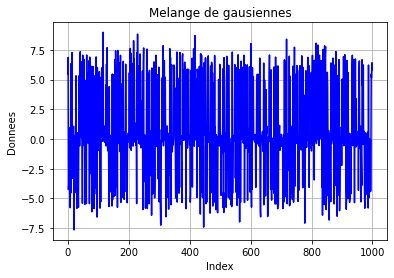

In [8]:
plt.plot(donnees, 'b')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

### Tracé des échantillons

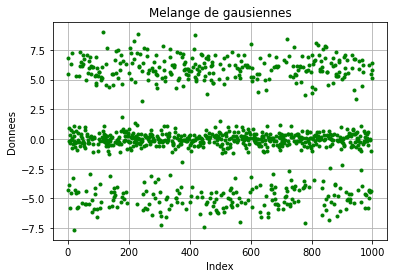

In [9]:
plt.plot(donnees, 'g.')
plt.title('Melange de gausiennes')
plt.xlabel('Index')
plt.ylabel('Donnees')
plt.grid()
plt.show()

### Tracé de l'histogramme des échantillons

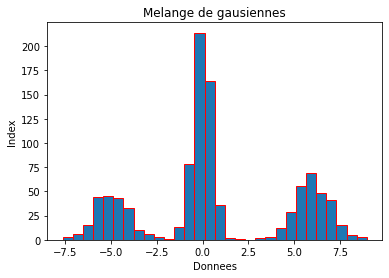

In [10]:
plt.hist(donnees, bins = 30, density = False, edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

### Tracé de l'histogramme des échantillons

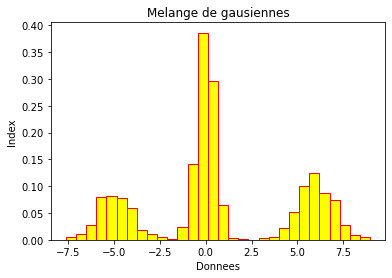

In [11]:
plt.hist(donnees, bins = 30, density = True, color = 'yellow', edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('Donnees')
plt.ylabel('Index')
plt.show()

### L'algorithme EM avec une distribution de gaussiennes

In [12]:
def EM_Algorithm(donnees, nb_it, mu_em, sigma_em, alpha_em):
    """
    EM algorithm
    """

    nbIteration = 1 #Initialisation de la variable d'arrêt
    nbComposante = len(alpha_em) #Nombre de composantes du mélange
    nbDonnees = len(donnees)  #Nombre de données
    p = np.zeros(shape=(nbComposante, nbDonnees))
    #Déclaration et initialisation de la matrice qui va contenir les probabilités
    #p(k|x,theta_courant)

    alpha_em_new = alpha_em
    sigma_em_carre_new = sigma_em
    mu_em_new = mu_em
    donneesP = np.zeros(shape=(nbEchantillon))

    while nbIteration < nbMaxIterations:
        # Création d'un array avec les lois a posteriori
        for n in range(0, nbDonnees):
            for k in range(0, nbComposante):
                p[k, n] = alpha_em[k] * norm.pdf(x = donnees[n], loc = mu_em[k], scale = sigma_em[k])
            p[:, n] = p[:, n] / np.sum(p[:, n])

        for k in range(0, nbComposante):
            alpha_em_new[k] = np.sum(p[k,:]) / nbDonnees
            for n in range(0, nbDonnees):
                donneesP[n] = donnees[n] * p[k, n]
            mu_em_new[k]  = np.sum(donneesP) / np.sum(p[k, :])
            for n in range(nbDonnees):
                donneesP[n] = ((donnees[n] - mu_em_new[k]) ** 2) * p[k, n]
            sigma_em_carre_new[k] = np.sum(donneesP) / np.sum(p[k, :])
        mu_em = mu_em_new
        sigma_em = np.sqrt(sigma_em_carre_new)
        alpha_em = alpha_em_new
        nbIteration = nbIteration + 1
    return(mu_em, sigma_em, alpha_em)

In [13]:
nbMaxIterations = 40
mu_em = np.array([-0.0156, -4.9148, 5.9692])
sigma_em = np.array([1.3395, 1.3395, 1.3395])
alpha_em = np.array([0.4800, 0.2200, 0.3000])

mu_em, sigma_em, alpha_em = EM_Algorithm(donnees, nbMaxIterations, mu_em, sigma_em, alpha_em)

In [14]:
print('Les paramètres estimés sont : ')
print('Moyennes des composantes du mélange', mu_em)
print('Ecart type des composantes du mélange', sigma_em)
print('Probabilités des composantes du mélange', alpha_em)

Les paramètres estimés sont : 
Moyennes des composantes du mélange [-2.03823515e-03 -4.93016856e+00  6.00805027e+00]
Ecart type des composantes du mélange [0.48489268 0.98026013 0.97462998]
Probabilités des composantes du mélange [0.50813235 0.20882407 0.28304358]


In [15]:
print('La somme des probabilités des composantes du mélange vaut : ', np.sum(alpha_em))

La somme des probabilités des composantes du mélange vaut :  1.0


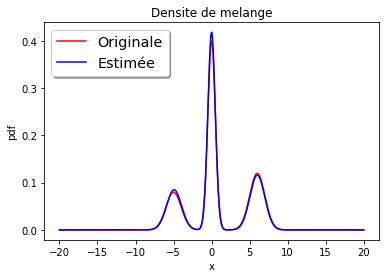

In [16]:
plt.plot(x, pointPdf, 'r-', label = 'Originale')
plt.title('Densite de melange')
plt.xlabel('x')
plt.ylabel('pdf')
pointPdfEstime = gm_pdf(x, mu_em, sigma_em, alpha_em)
plt.plot(x, pointPdfEstime, 'b-', label = 'Estimée')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

# Application à l'éloignement de galaxies

## Extraction des données à partir du fichier xls

In [17]:
velocity_pd = pd.read_csv('Galaxy.csv')
velocity = np.array(velocity_pd).T[0]

nb_vel = velocity.size
mu, sigma = np.mean(velocity), np.var(velocity)
print("La moyenne des vitesses vaut : {:.2f}".format(mu))
print("La variance des vitesses vaut : {:.2f}".format(sigma))

vel_min = velocity.min()
vel_max = velocity.max()

La moyenne des vitesses vaut : 20975.41
La variance des vitesses vaut : 19168825.33


## Tracé de l'histogramme et des courbes de vitesse

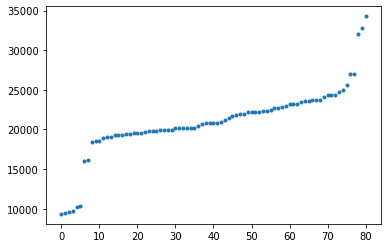

In [18]:
plt.figure()
plt.plot(velocity, '.')

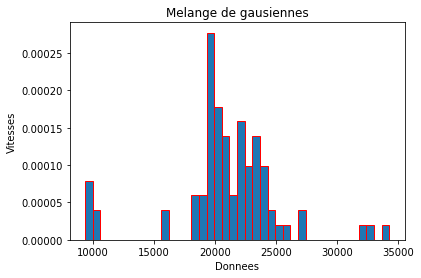

In [19]:
plt.hist(velocity, bins = 40, density = True, edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('Donnees')
plt.ylabel('Vitesses')
plt.show()

## Choix des gaussiennes

### Paramètres des gaussiennes

In [20]:
x = np.arange(vel_min-100, vel_max+100, 5)

Les paramètres estimés sont : 
Moyennes des composantes du mélange [19874.7263 29676.0178  9799.8333 23153.4656]
Ecart type des composantes du mélange [1263.315  3733.9655  389.8168 1093.4863]
Probabilités des composantes du mélange [0.50492452 0.07153879 0.07407407 0.34946263]


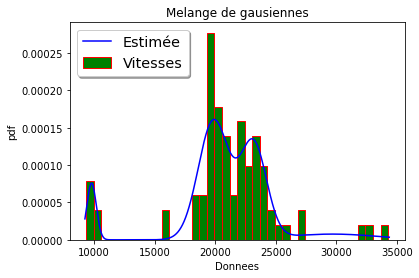

In [21]:
gm = GaussianMixture(n_components=4, covariance_type='full').fit(velocity.reshape(-1, 1))
# la méthode fit de GaussianMixture utilise l'algorithme EM.

nbMaxIterations = 40
mu_em_mod = np.round(gm.means_.ravel(), 4)
sigma_em_mod = np.round(np.sqrt(gm.covariances_.T.ravel()), 4)
alpha_em_mod = gm.weights_

print('Les paramètres estimés sont : ')
print('Moyennes des composantes du mélange', mu_em_mod)
print('Ecart type des composantes du mélange', sigma_em_mod)
print('Probabilités des composantes du mélange', alpha_em_mod)

pointPdf = gm_pdf(x, mu_em_mod, sigma_em_mod, alpha_em_mod)

plt.figure
plt.hist(velocity, bins = 40, density = True, color='green', edgecolor = "red", label = 'Vitesses')
plt.plot(x, pointPdf, 'b-', label = 'Estimée')
plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel('Donnees')
plt.ylabel('pdf')
plt.title('Melange de gausiennes')
plt.show()

## Critères AIC et BIC

Pour mesurer la qualité du modèle statistique, on s'intéresse au critère d'information d'Akaike (AIC) et au critère d'information bayésien (BIC) définit comme suit :  
\begin{align*}
AIC & = 2k - 2\ln(\hat{L})\\
BIC & = k\ln n - 2\ln(\hat{L})
\end{align*}
Avec $n$ le nombre d'obersvations, $k$ le nombre de paramètres à estimer et $\hat{L}$ la vraisemblance du modèle estimée.
Parmis un ensemble de modèles, celui le plus optimal aura l'AIC le plus faible, et le BIC le plus faible.

Dans notre cas, nous cherchons à estimer le nombre optimal de gaussiennes à partir de ces critères (en effet, plus on a de gaussiennes, plus le nombre de paramètres à estimer augmente, une gaussienne équivaut à 3 paramètres à estimer).

In [25]:
# Checking AIC and BIC values for the same number of gaussians
AIC, BIC = [], []
for i in range(250) :
    gm = GaussianMixture(n_components=20, covariance_type='full').fit(velocity.reshape(-1, 1))
    AIC.append(gm.aic(velocity.reshape(-1, 1)))
    BIC.append(gm.bic(velocity.reshape(-1, 1)))

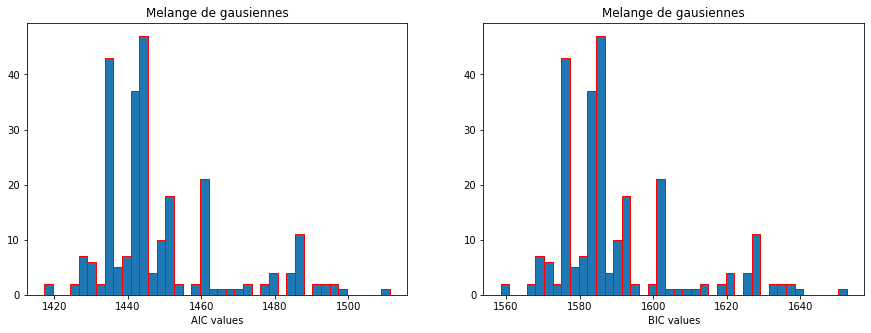

In [26]:
# plotting the two histograms
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(AIC, bins = 40, edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('AIC values')

plt.subplot(122)
plt.hist(BIC, bins = 40, edgecolor = "red")
plt.title('Melange de gausiennes')
plt.xlabel('BIC values')
plt.show()

Nous observerons dans un premier temps que les deux critères ont la même répartition (car une méthode de calcul similaire). Cependant, ces deux critères peuvent prendre des valeurs éloignées pour un même problème (k et n fixés, k grand). Il parait donc compliqué de pouvoir estimer le nombre de gausienne en utilisant un de ces critère.

In [27]:
nb_gaussian = range(2, 21)
covariance = ['full', 'tied', 'spherical', 'diag']

AIC_tot, AICc_tot, BIC_tot = [], [], []
for cov in covariance :
    AIC, AICc, BIC = [], [], []
    for nb in nb_gaussian :
        gm = GaussianMixture(n_components=nb, covariance_type=cov, n_init=30).fit(velocity.reshape(-1, 1))
        aic = gm.aic(velocity.reshape(-1, 1))
        AIC.append(aic)
        AICc.append(aic + (2*3*nb*(3*nb + 1))/(nb_vel - 3*nb - 1))
        BIC.append(gm.bic(velocity.reshape(-1, 1)))
    AIC_tot.append(AIC)
    AICc_tot.append(AICc)
    BIC_tot.append(BIC)
AIC_tot, AICc_tot, BIC_tot = np.array(AIC_tot), np.array(AICc_tot), np.array(BIC_tot)

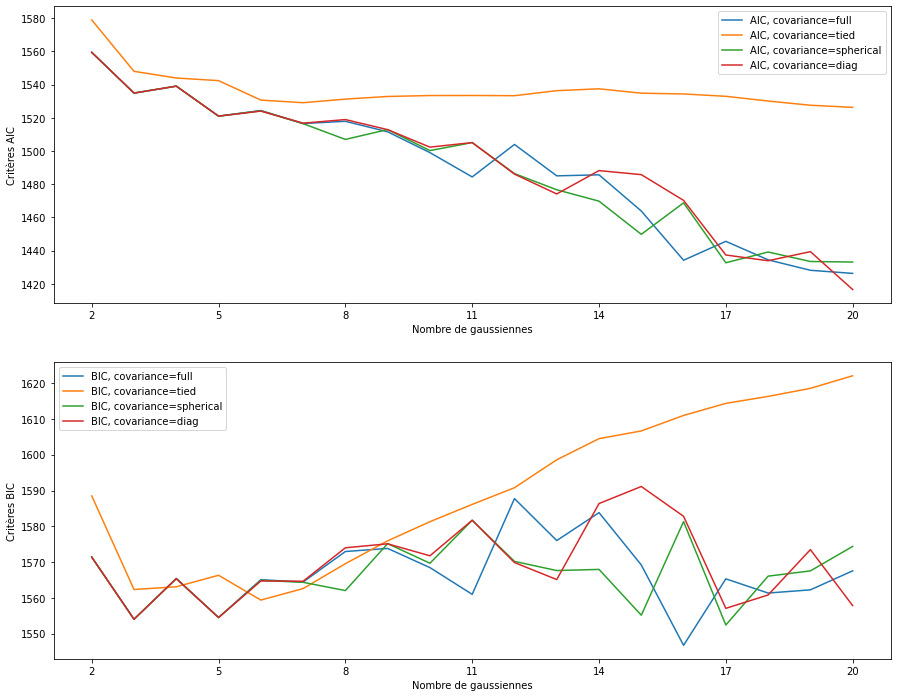

In [28]:
plt.figure(figsize=(15, 12))

plt.subplot(211)
for i in range(len(covariance)) :
    plt.plot(nb_gaussian, AIC_tot[i], label=f'AIC, covariance={covariance[i]}')
plt.xlabel("Nombre de gaussiennes")
plt.xticks([2, 5, 8, 11, 14, 17, 20])
plt.ylabel("Critères AIC")
plt.legend()

plt.subplot(212)
for i in range(len(covariance)) :
    plt.plot(nb_gaussian, BIC_tot[i], label=f'BIC, covariance={covariance[i]}')
plt.xlabel("Nombre de gaussiennes")
plt.xticks([2, 5, 8, 11, 14, 17, 20])
plt.ylabel("Critères BIC")
plt.legend()
plt.show()

Nous voyons ici que ces deux critères n'évoluent pas de la même manière lorsque le nombre de paramètres à estimer augmente. Pour les échantillons de petite taille ($k\approx n$), nous utiliserons l'AICc définit comme suit :
$$AICc = AIC+\frac{2k(k+1)}{n - k - 1}$$

L'AICc intègre une pénalité supplémentaire pour les paramètres additionnels. L'utilisation de l'AIC plutôt que de l'AICc lorsque $n$ n'est pas beaucoup plus grand que $k$ augmente la probabilité de sélectionner un modèle avec un trop grand nombre de paramètres.

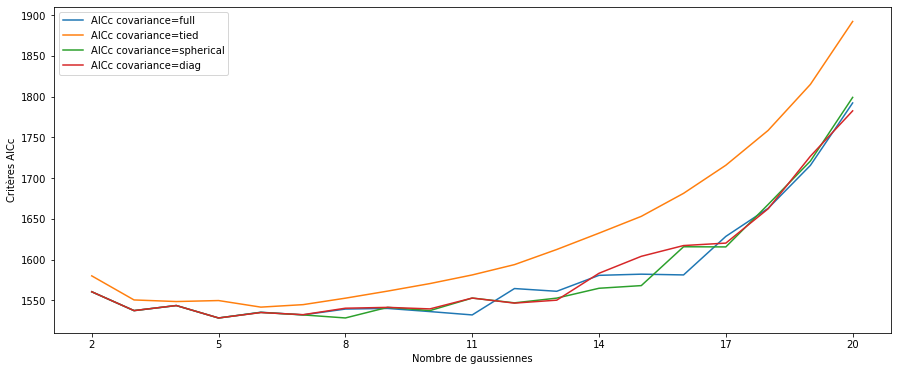

In [29]:
plt.figure(figsize=(15, 6))
for i in range(len(covariance)) :
    plt.plot(nb_gaussian, AICc_tot[i], label=f'AICc covariance={covariance[i]}')
plt.xlabel("Nombre de gaussiennes")
plt.xticks([2, 5, 8, 11, 14, 17, 20])
plt.ylabel("Critères AICc")
plt.legend()
plt.show()

En utilisant L'AICc, on obtient la même évolution que le BIC, mais avec des oscillations moins marquées. C'est ce paramètre que nous utilisons pour selectionner le nombre optimal de gaussiennes.

In [30]:
index = np.argmin(np.sum(AICc_tot, axis=0))

print(f"Le nombre optimal de gaussiennes pour représenter ces observations est {index}")
print(f"Le nombre de paramètres à estimer est alors de k={3*index}")

Le nombre optimal de gaussiennes pour représenter ces observations est 3
Le nombre de paramètres à estimer est alors de k=9


Le résultat trouvé en utilisant le critère AICc est proche de celui trouvé par observation simples ci-dessus.